# Übung 1

In dieser Übung beschäftigen Sie sich mit dem kNN Verfahren und mit der Machine-Learning Bibliothek <a href="https://scikit-learn.org/stable/">sklearn</a>. 

Die Datensätze werden im weiteren Verlauf der Vorlesung häufig als <a href="https://numpy.org/">Numpy</a>-Arrays oder als <a href="https://pandas.pydata.org/">pandas</a>-Dataframes eingelesen und verarbeitet. Eine gute Einführung in diese beiden Bibliotheken bietet das Buch <a href="https://ebookcentral.proquest.com/lib/othaw/detail.action?docID=5572584">Datenanalyse mit Python</a>, das inzwischen aus dem Hochschulnetz kostenlos als E-Book verfügbar ist.

Zuerst werden ein paar Module importiert:

In [20]:
import pandas as pd
import numpy as np

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In den folgenden Aufgaben soll mit dem Iris-Datensatz gearbeitet werden. Dazu wird er geladen:

In [22]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#### Visualisierung

Die Bibliothek Matplotlib stellt Funktionalität zur Visualisierung bereit. Eine umfangreiche Sammlung an Beispielen finden Sie <a href="https://matplotlib.org/gallery.html#">hier</a>. Wir wollen den Iris-Datensatz visualisieren und zeichnen dazu zwei Streudiagramme.

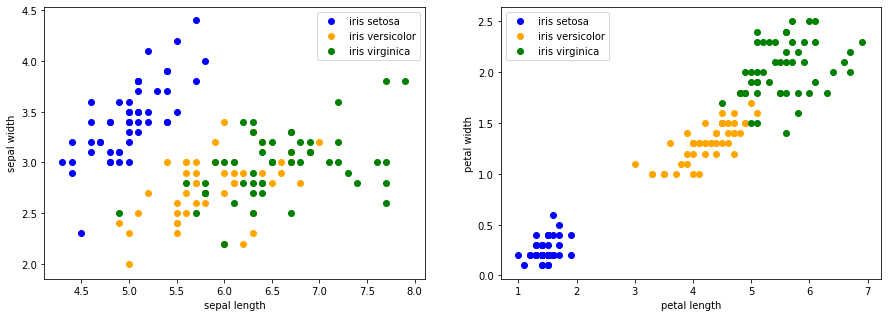

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(X[y==0,0], X[y==0,1], c='blue')
ax1.scatter(X[y==1,0], X[y==1,1], c='orange')
ax1.scatter(X[y==2,0], X[y==2,1], c='green')
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax1.legend(['iris setosa','iris versicolor','iris virginica'])

ax2.scatter(X[y==0,2], X[y==0,3], c='blue')
ax2.scatter(X[y==1,2], X[y==1,3], c='orange')
ax2.scatter(X[y==2,2], X[y==2,3], c='green')
ax2.set_xlabel('petal length')
ax2.set_ylabel('petal width')
ax2.legend(['iris setosa','iris versicolor','iris virginica'])

#### Train-Test-Split

Die Hälfte der Daten wird zum Modelltraining verwendet, die andere Hälfte zum Testen:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

### Aufgabe 1: KNN-Implementierung

In dieser Aufgabe soll das KNN-Verfahren "from scratch" implementiert werden.

#### a) Euklidische Distanz

Schreiben Sie eine Funktion namens **dist**, die die Euklidische Distanz zwischen zwei Punkten P1 und P2 berechnet. Verwenden Sie dazu eine *list comprehension*. Wie lautet die euklidische Distanz zwischen den beiden ersten in X_train enthaltenen Objekten?

In [25]:
import math
def dist(P1, P2):
    """
    Parameters:
        P1,P2 (array like): points to calculate distance

    Returns:
        Euclidean distance of P1, P2

    """

    return sum([(p1-p2)**2 for (p1,p2) in zip(P1,P2)])**(0.5)
    
    #TODO
    
    


In [26]:
dist(X_train[0, 0:2],X_train[1, 0:2])

0.9486832980505132

#### b) Bestimmung der nächsten Nachbarn

Schreiben Sie eine Funktion namens **get_neighbors**, welche die Indizes der  **n_neighbors** nächsten Nachbarn eines gegebenen Punktes Q in einem Datensatz X zurückgibt.<br>
Hinweis: die Funktion **numpy.argsort** kann hilfreich sein.

In [27]:
def get_neighbors(Q, X, n_neighbors):
    """
    Computes the n_neighbors nearest neighbors of Q in X
    
    Parameters:
        Q (array-like): query point
        n_neighbors (int): number of neighbors so search

    Returns:
        array of shape = [n_neighbors, 1] containing the row indices of the 
        n_neighbors nearest neighbors of Q in X

    """
    #TODO
    return (np.array([dist(Q, P) for P in X])).argsort()[0:n_neighbors]


In [28]:
get_neighbors(X[0], X, 4)

array([ 0, 17,  4, 39], dtype=int64)

#### c) Klassifikation des Testdatensatzes

Ermitteln Sie die Klassenzuordnung für alle Objekte des Testdatensatzes.
Vervollständigen Sie dazu die funktion **predict**.

In [29]:
def predict(X_train, y_train, X_test, n_neighbors):
    """
    Predicts the class of all objects in X_test using k-NN 
    
    Parameters:
        X_train (array-like): training samples of shape [n_samples,n_features]
        y_train (array-like): training labels of shape = [n_samples]
        X_test (array-like): test samples of shape [n_query, n_features]
        n_neighbors (int): number of neighbors so search for

    Returns:
        array of shape = [n_query, 1] containing the predicted labels

    """


    #TODO
    y_test = np.zeros((X_test.shape[0]))   
    for (x, i) in zip(X_test, range(X_test.shape[0])):
            neighbors = get_neighbors(x, X_train, n_neighbors)  
            y_neigbors = [y_train[neighbors[n]] for n in range(n_neighbors)]
            y_test[i] = max(set(y_neigbors), key = y_neigbors.count)
    return y_test

In [30]:
y_hat = predict(X_train,y_train,X_test,5)
y_hat

array([0., 2., 0., 1., 1., 0., 0., 0., 0., 2., 1., 0., 0., 0., 0., 2., 2.,
       0., 2., 1., 2., 0., 1., 1., 0., 1., 0., 1., 2., 2., 2., 1., 2., 1.,
       1., 2., 0., 0., 2., 1., 1., 0., 2., 0., 1., 1., 1., 1., 2., 1., 0.,
       0., 0., 0., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2.,
       0., 0., 0., 1., 2., 2., 2.])

#### d) Modellbewertung

Bewerten Sie die Güte des Modells, indem Sie den Anteil der falsch klassifizierten Objekte des Trainingsdatensatzes berechnen. 

In [31]:
#TODO
y_hat = predict(X_train,y_train,X_test,5)

trueClas = np.count_nonzero(y_hat==y_test)
print(trueClas*100/y_hat.shape[0], "%")

94.66666666666667 %


### Aufgabe 2: KNN mit Scikit Learn

Wiederholen Sie Aufgabe 1 unter Verwendung der Klasse <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNeighborsClassifier</a> der Bibliothek sklearn. Machen Sie sich zunächst anhand der Dokumentation mit der Funktionsweise der Klasse vertraut.

In [32]:
#TODO
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
print(neigh.score(X_test, y_test))

0.9466666666666667


### Aufgabe 3: kNN mit k-d-Tree

In dieser Aufgabe soll das kNN-Verfahren mit Hilfe eines k-d-Baums realisiert und getestet werden. <br>


#### a) Implementierung eines k-d-Baums

Vervollständigen Sie die unten stehende Klasse **KDNode** zum Aufbau eines k-d-Baums. 

In [216]:
class KDTreeH:
    def __init__(self):
        self.root = KDNode()
    
    def construct(self, X, min_samples_leaf):    
        """
        Constructs a KDTree from the data set X having at least min_samples_leaf data points in each leaf.
        This method calls the recursive method construct from the class KDNode
        """    
        self.root.construct(X, min_samples_leaf)
        
    def find_nearest_neighbor(self, Q):
        """
        Find nearest neighbor of Q in the KDTree
        """  
        return self.root.find_nearest_neighbor(Q)
    
    
    
class KDNode:
    """
    The class KDNode provides the node data structure and methods to recursively construct a KDTree
    from a given data set.
    """ 
    
    def __init__(self, parent=None, split_var=0, name="|"):
        self.X = None
        self.left = None #left child of current node
        self.right = None #right child of current node
        self.parent = parent 
        self.thresh = np.inf
        self.split_var = split_var #Nummer der Komponente (x, y)
        self.name = name
       
    def construct(self, X, min_samples_leaf):
        """
        Recursively constructs a KDTree below the current node using the data X, cycling through the variables of X. The first split is 
        done using the variable self.split_var. A node is not split if the resulting children contained less than min_samples_leaf data points
        """
        #TODO
        self.X = X
        self.thresh = np.median(X[:,self.split_var])          
        
        a = X[X[:,self.split_var] < self.thresh]
        b = X[X[:,self.split_var] >= self.thresh]
               
        if len(a) > min_samples_leaf and len(b) > min_samples_leaf:   
            left = KDNode(parent = self, split_var = (self.split_var+1)%X.shape[1], name = self.name + " < ")
            left.construct(np.array(b), min_samples_leaf)
            self.left = left
            
            right = KDNode(parent = self, split_var = (self.split_var+1)%X.shape[1], name = self.name + " > ")
            right.construct(np.array(a), min_samples_leaf)
            self.right = right

        else:
            self.split_var = None

        print("NAME:",self.name,"  ", self.thresh,"  ", self.X.shape)
    
    def find_leaf(self, Q):
        """
        Finds a leaf to be searched for nearest neighbors by stepping down from the current node along the "good path"
        where the entries of Q satisfy all subsequent node conditions.
        """
        if self.split_var is None: #the current node is a leaf
            return self
        else: #step down
            if Q[self.split_var] < self.thresh:
                return self.left.find_leaf(Q)
            else:
                return self.right.find_leaf(Q)
    
    def get_sibling(self):
        """
        Returns the sibling node of the current node.
        """
        parent = self.parent
        if parent is not None:
            if parent.left is not self:
                return parent.left
            else:
                return parent.right
        else:
            return None
    
    def find_nearest_neighbor(self, Q, dist=np.inf, nn=[]):
        """
        Recursively computes the nearest neighbor of Q in the current subtree
        """
        #get leaf stepping down the "good sides" of the current subtree
        #TODO
        leaf = self.find_leaf(Q)
        print("\n")
        print("Go To Leaf   ", leaf.name)
             
        #calculate distance of Q to all points in the leaf
        #TODO
        eukli = [sum([(p1-p2)**2 for (p1,p2) in zip(P,Q)])**(0.5) for P in leaf.X]
        leafmin = min(eukli)
        leafminP = X[eukli.index(min(eukli))]

        
        #if new nearest neighbor was found in leaf: exchange current nearest neighbor by closest point in leaf
        #TODO
        if(leafmin < dist):
            dist = leafmin      
            print("Found Smaller Dist   ", dist)

        
        #recursively step back up and treat the sibling nodes
        #TODO
        nn.append(self)
        nn.append(leaf)
        sib = leaf.get_sibling()
        print("SIB", sib)
        if sib is None:
            return dist
        elif sib not in nn:
            print("Go To Sibling   ", sib.name)
            sib.find_nearest_neighbor(Q=Q, dist=dist)
        else:            
            #alle Kinder durch, parent als abgeschlossen markieren
            parent = leaf.parent
            
            #Prüfen, ob Elter einen Sibling hat
            while True:
                if(parent is not None):
                    print("No More Siblings Go To Parent   ", parent.name)
                    nn.append(parent)
                    parentSib = parent.get_sibling()
                
                if parentSib is None:
                    print("Root")
                    print(dist)
                    return dist
                    
                elif parentSib not in nn:
                    print("Check Sibling of Parent   ", parentSib.name)
                    parent = parentSib.find_nearest_neighbor(Q=Q, dist=dist)
                elif parentSib in nn:
                    print("Check Sibling of Parent   ", parentSib.name)
    
                    parent = parent.parent

        
        

In [217]:
H = np.random.rand(30,2)


In [218]:
tree = KDTreeH()
tree.construct(H, 5)
dist = tree.find_nearest_neighbor([0.5, 0.5])
print(dist)

NAME: | <  <     0.6332773077682902    (8, 2)
NAME: | <  >     0.6806042360916695    (7, 2)
NAME: | <     0.3848428127948601    (15, 2)
NAME: | >  <     0.17277288515937367    (8, 2)
NAME: | >  >     0.18715167042713143    (7, 2)
NAME: | >     0.6622315982332724    (15, 2)
NAME: |    0.37438150006756155    (30, 2)


Go To Leaf    | >  < 
Found Smaller Dist    0.41365465207202023
SIB <__main__.KDNode object at 0x000001BD8FB98948>
Go To Sibling    | >  > 


Go To Leaf    | >  > 
Found Smaller Dist    0.18071147784843153
SIB <__main__.KDNode object at 0x000001BD8FC49E08>
No More Siblings Go To Parent    | > 
Check Sibling of Parent    | < 


Go To Leaf    | <  > 
SIB <__main__.KDNode object at 0x000001BD8FC49FC8>
Go To Sibling    | <  < 


Go To Leaf    | <  < 
Found Smaller Dist    0.035139870075523744
SIB <__main__.KDNode object at 0x000001BD8FC49BC8>
No More Siblings Go To Parent    | < 
Check Sibling of Parent    | > 
No More Siblings Go To Parent    |
Root
0.035139870075523744
Check 

AttributeError: 'NoneType' object has no attribute 'parent'

In [183]:
from sklearn.neighbors import KDTree
tree = KDTree(H, leaf_size=5) 
dist, ind = tree.query([[0.5, 0.5]], k=1)  
print(dist)

[[0.10621972]]


#### b) Test des k-d-Baums

Erzeugen Sie einen zufälligen Datensatz der Dimension (10000,2) und messen Sie, wieviele Vergleiche benötigt werden, um den nächsten Nachbarn des Punkts (0.5,0.5) zu finden. Wiederholen Sie das Experiment mit Datensätzen der Längen 50000, 100000, 200000 und 400000. Vergrößern Sie anschließend die Anzahl der Features und wiederholen Sie das Experiment. Wie lassen sich Ihre Beobachtungen erklären?

In [ ]:
#TODO

#### c) Implementierung der Nearest Neighbor-Klassifikation mit KDTree 

Implementieren Sie einen Nearest Neighbor-Klassifikator unter Verwendung der Klasse KDTree

In [ ]:
#TODO